In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 10                #number of agents
N_buckets = 20               #number of buckets
max_moves = 100              #max number of moves in single game
rn_seed = 14                 #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_moves, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment)
print 'state = ', state
reward = get_reward(state)
print 'reward = ', reward
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
N_turn = 0
game_state = get_game_state(N_turn, environment)
print 'game_state = ', game_state

environment =  {'acts': ['move to 0', 'move to 1', 'move to 2', 'move to 3', 'move to 4', 'move to 5', 'move to 6', 'move to 7', 'move to 8', 'move to 9', 'move to 10', 'move to 11', 'move to 12', 'move to 13', 'move to 14', 'move to 15', 'move to 16', 'move to 17', 'move to 18', 'move to 19'], 'actions': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'N_agents': 10, 'max_moves': 100, 'rn_seed': 14, 'N_buckets': 20}
state =  {'agent_locations': array([ 0,  5,  6,  7,  8, 10, 11, 14, 18, 19]), 'next_agent': 6}
reward =  98.0
state_vector =  [[ 1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.
   1.  1.]]
game_state =  running


In [6]:
#illustrate moving an agent
action = N_buckets/2
state_next = update_state(state, environment, action)
print 'action = ', action
print 'state_next = ', state_next
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

action =  10
state_next =  {'agent_locations': array([ 0,  5,  6,  7,  8, 10, 10, 14, 18, 19]), 'next_agent': 7}
state_vector_next =  [[ 1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
   1.  1.]]


In [7]:
#play 100 games making random actions, and stash moves in memories queue
N_games = 100
strategy = 'random'
memories = make_memories(environment, strategy, N_games)
print 'number of memories = ', len(memories)

number of memories =  10100


In [8]:
#build model
N_inputs = N_buckets
N_outputs = N_buckets
N_neurons = N_inputs*N_outputs
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               8400      
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
activation_2 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                8020      
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
Total params: 176,820
Trainable params: 176,820
Non-trainable params: 0
_________________________________________________________________
None

In [9]:
#train model
N_games = 200                               #number of games to be played during training
gamma = 0.85                                #discount for future rewards
batch_size = 20                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  20
training model
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
training done


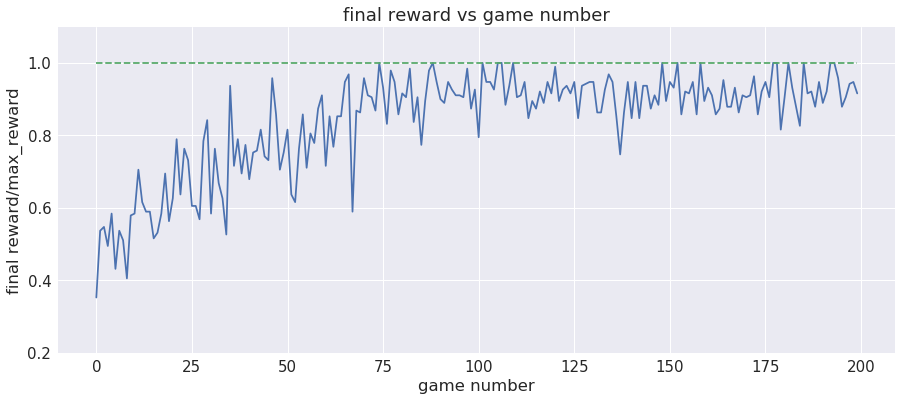

In [10]:
#plot final_reward vs game_number
max_rewards = N_agents*(N_buckets-1)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards/max_rewards
p = ax.plot(xp, yp)
p = ax.plot(xp, yp*0+1, linestyle='dashed')
p = ax.set_ylim(0.2, 1.1)
p = ax.set_title('final reward vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('final reward/max_reward')

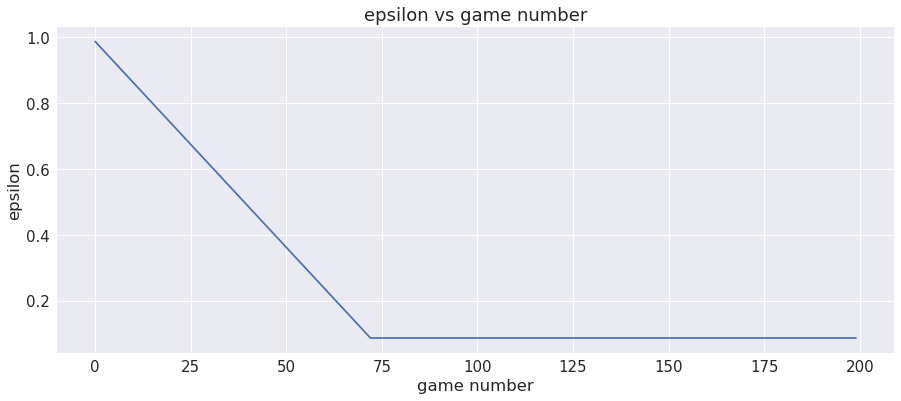

In [11]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

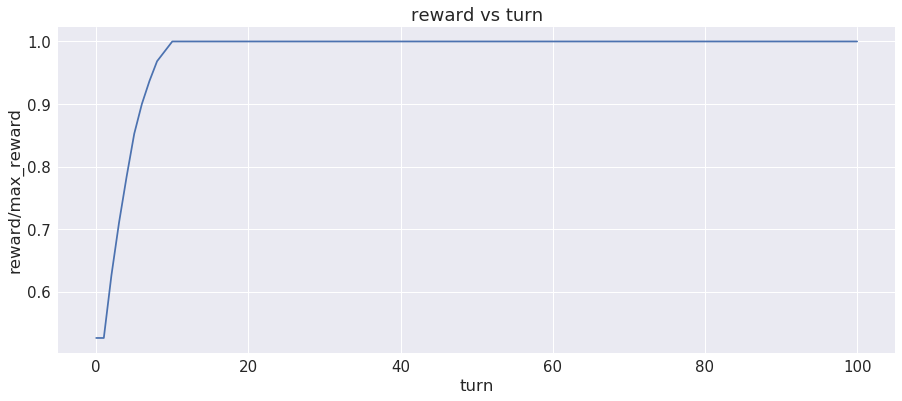

In [12]:
#play one smart game
strategy = 'smart'
memories = play_game(environment, strategy, model=trained_model)
actions, rewards, turn = memories2timeseries(memories)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = turn
yp = rewards/max_rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/max_reward')

In [13]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  1.84635281563
